<a href="https://colab.research.google.com/github/xdderekchen/ML/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

 * sklearn Linear Regressor
 * Statmodels 
 * SPARK ML
 * TensorFlow
   * Single-layers
   * Multi-layers

## DataSet Preparation
 using data from http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.datasets import load_boston
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)
df_x.describe()

#Split the data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

x_train_columns = list(x_train.columns)

from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler( )
x_train_np = scaler.fit_transform( x_train ) #fit and then transform
x_test_np  = scaler.transform ( x_test )     #transform

x_train = pd.DataFrame(x_train_np,  columns=x_train.columns)
x_test  = pd.DataFrame(x_test_np,  columns=x_train.columns)

# Some algorithm may prefer scaled data

## By LinearRegression from sklearn

regression cooefficients:

     feature       coef
0   intecept  22.970796
1       CRIM  -0.988580
2         ZN   0.867933
3      INDUS   0.405028
4       CHAS   0.861838
5        NOX  -1.900100
6         RM   2.808135
7        AGE  -0.358669
8        DIS  -3.045535
9        RAD   2.032761
10       TAX  -1.364009
11   PTRATIO  -2.082536
12         B   1.041257
13     LSTAT  -3.926286

The model performance for  training  set
--------------------------------------
RMSE is 4.794269062151269
R2 score is 0.7392344370995025

The model performance for  testing  set
--------------------------------------
RMSE is 4.552364598463061
R2 score is 0.7261570836552478


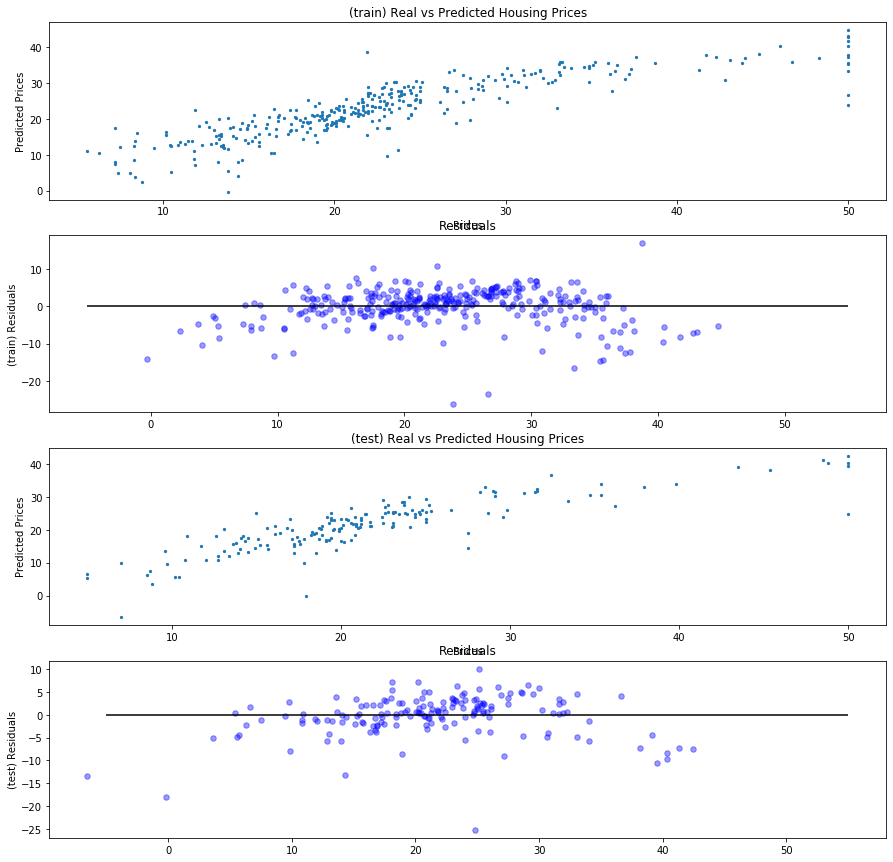

In [8]:

#Initialize the linear regression model
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

#Print the coefecients/weights for each feature/column of our model
coefDataFrame = pd.DataFrame( zip( ["intecept"] +  x_train_columns, 
                                   list(lin_model.intercept_) + list(lin_model.coef_.flatten())),
                              columns=['feature', 'coef'])

print("regression cooefficients:\n")
print(coefDataFrame)

def linear_Reg_report(dataset_type, predict_Y, actual_Y):
    rmse = (np.sqrt(mean_squared_error(actual_Y, predict_Y)))
    r2 = r2_score(actual_Y, predict_Y)

    print("\nThe model performance for ",  dataset_type, " set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))


y_train_predict = lin_model.predict(x_train)
y_test_predict =  lin_model.predict(x_test)

linear_Reg_report("training", y_train_predict, y_train)
linear_Reg_report("testing",  y_test_predict, y_test)

plt.figure(figsize=(15, 15))

plt.subplot(4, 1, 1)
plt.scatter( y_train, y_train_predict, s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "(train) Real vs Predicted Housing Prices")

plt.subplot(4, 1, 2)
plt.scatter( y_train_predict, y_train_predict - y_train,
c ='b', s=30, alpha=0.4 )
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "(train) Residuals" )

plt.subplot(4, 1, 3)
plt.scatter( y_test, y_test_predict, s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "(test) Real vs Predicted Housing Prices")

plt.subplot(4, 1, 4)
plt.scatter( y_test_predict, y_test_predict - y_test,
c ='b', s=30, alpha=0.4 )
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "(test) Residuals" )
plt.show()


plt.show()

## By Statmodels

In [9]:

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

X = sm.add_constant(x_train) # adding a constant

sm_model = sm.OLS(y_train.values, X).fit()
sm_model_summary = sm_model.summary()
print(sm_model_summary)

sm_params = pd.DataFrame(
     {"feature": ["intecept"] +  x_train_columns, 
       "coef"  : sm_model.params.values
     },
     columns=['feature', 'coef'])

    
print(sm_params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     70.87
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.49e-86
Time:                        03:02:42   Log-Likelihood:                -1012.4
No. Observations:                 339   AIC:                             2053.
Df Residuals:                     325   BIC:                             2106.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9708      0.266     86.376      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## By Spark ML

install pyspark library

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz

#package to add PySpark to sys.path at runtime
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
import findspark
findspark.init() 

In [0]:
import numpy as np
import pandas as pd

from pyspark.sql import SparkSession
from pyspark.context import SparkContext

globs = globals()
spark = SparkSession.builder.enableHiveSupport().getOrCreate()
sc = spark.sparkContext

#import data from previuos session, x_train, x_test, y_train, y_test
xx_train =  x_train.copy()
xx_train["Y"] = y_train.values
xx_test =  x_test.copy()
xx_test["Y"] = y_test.values

x_train_sp = spark.createDataFrame(xx_train)
x_test_sp  = spark.createDataFrame(xx_test)

##### INPUT FOR SPARK
# Spark ML’s algorithms expect the data to be represented in two columns: Features and Labels. 
# 1. Features is an array of data points of all the features to be used for prediction. 
# 2. Labels contain the output label for each data point.

# To create a features array, import the VectorAssembler class and pass in a list of the feature column names.
from pyspark.ml.feature import VectorAssembler
feature_columns = x_train_sp.columns[:-1]   # do not include "Y" column (which is the last one)
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")
x_train_sp = assembler.transform(x_train_sp)
#x_train_sp["label"] = y_train.values
print(x_train_sp.show(5))

from pyspark.ml.regression import LinearRegression
# Defining the algorithm variable. We need to specify the name of the features column and the labels column.
algorithm = LinearRegression(featuresCol="features", labelCol="Y")

model_spark = algorithm.fit(x_train_sp)

print("Intercept", model_spark.intercept, "\n",
      "Coefficient: ", model_spark.coefficients)


# Evaluating Model Performance
x_test_sp = assembler.transform(x_test_sp)

evaluation_summary = model_spark.evaluate(x_train_sp)
print("TRAINING ------------------------------------")
print("MAE: ", evaluation_summary.meanAbsoluteError)
print("RMSE: ", evaluation_summary.rootMeanSquaredError)
print("R2: ", evaluation_summary.r2)

evaluation_summary = model_spark.evaluate(x_test_sp)
print("TESTING -------------------------------------")
print("MAE: ", evaluation_summary.meanAbsoluteError)
print("RMSE: ", evaluation_summary.rootMeanSquaredError)
print("R2: ", evaluation_summary.r2)


+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+----+--------------------+
|                CRIM|                 ZN|               INDUS|                CHAS|                 NOX|                  RM|               AGE|                DIS|                RAD|                 TAX|            PTRATIO|                  B|               LSTAT|   Y|            features|
+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+----+--------------------+
|  0.8962487154968979|-0.5106013881354163|   0.982782232206114|-0.28821362329313566| 0.48083147770775053|-0.1977673372

## Using Tensorflow

### Single layer network. 
This one should be in theory same as the linear regression.

However since we need to specify the learning rate and epoch, we can only get the coefficients very close to the coefficients from the above methods.

2.1.0

..........
..........
..........
..........
..........
..........
....6323


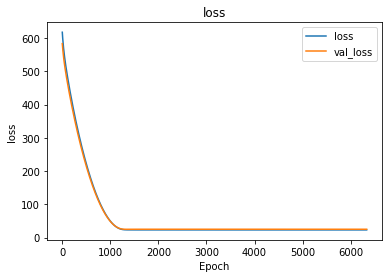

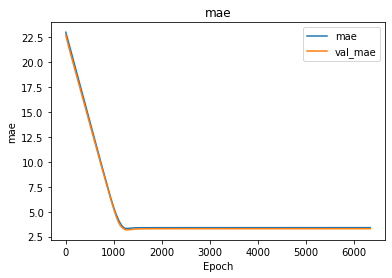

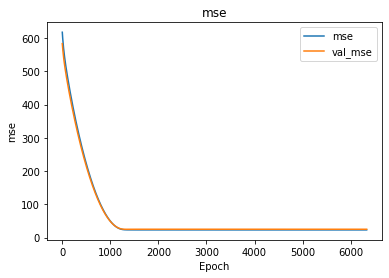

339/339 [==============================] - 0s 43us/sample - loss: 23.2693 - mae: 3.3745 - mse: 23.2693
Train :evaluate score =  [23.26926042899973, 3.3745215, 23.26926]
167/167 [==============================] - 0s 60us/sample - loss: 21.9838 - mae: 3.2699 - mse: 21.9838
Test :evaluate score =  [21.983775955474304, 3.269892, 21.983778]

The model performance for  training  set
--------------------------------------
RMSE is 4.823822133373913
R2 score is 0.7360096804949456

The model performance for  testing  set
--------------------------------------
RMSE is 4.688685998302498
R2 score is 0.7095109712987798

the coefficient is as the following:
[[-1.0209309 ]
 [ 0.87147653]
 [ 0.47828507]
 [ 0.7215416 ]
 [-1.6400989 ]
 [ 2.5242193 ]
 [-0.10171466]
 [-2.7003927 ]
 [ 1.691111  ]
 [-1.1543294 ]
 [-2.0122602 ]
 [ 1.1727936 ]
 [-4.508147  ]]
Bias:  [22.928215]


In [32]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
                                                     
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1000 == 0: print('')
    if epoch % 100 == 0: print(".", end='')

early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

widthX = x_train.shape[1]
#build our model
model = Sequential([
    Dense(1, input_shape=(widthX,), use_bias=True)
   ])

model2 = Sequential([
    Dense(32, activation='relu', input_shape=(widthX,)),
    Dense(16, activation='relu'),
    Dense(1)
   ])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002) # Default value
model.compile(optimizer=optimizer,loss='mse', metrics =['mae', 'mse'])

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=10000,
    shuffle=False,
    validation_split = 0.2,
    verbose=0, callbacks=[early_stop, PrintDot()]
)

minepoch = np.argmin(history.history["loss"])
print(minepoch)

def print_coeff():
  print("\nthe coefficient is as the following:")
  for trainable_variable in model.trainable_weights:
    name = trainable_variable.name
    values =  trainable_variable.read_value().numpy()
    if ("/bias:" in name):
      print("Bias: ", values)
    else:
      print(values)

def plot_Tesor(history, ylabel):
  import matplotlib.pyplot as plt
  plt.clf()
  for k in history.keys():
    if k.endswith(ylabel):
      plt.plot(history[k], label=k)
  plt.title(ylabel)
  plt.ylabel(ylabel)
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

plot_Tesor(history.history, "loss")
plot_Tesor(history.history, "mae")
plot_Tesor(history.history, "mse")

def model_sum(model, X, Y, Title="Train"):
  score = model.evaluate(X, Y)
  print(Title, ":evaluate score = ", score)

model_sum(model, x_train, y_train, "Train")
model_sum(model, x_test,  y_test,  "Test")

y_train_predict = model.predict(x_train)
y_test_predict =  model.predict(x_test)

linear_Reg_report("training", y_train_predict, y_train)
linear_Reg_report("testing",  y_test_predict, y_test)

print_coeff()

Multi-layers

This is fun part. As you can see, multi-layer can immediately improve the prediction power.

 * training  set: **R2 score is 0.9587141624082106**
 * testing  set: **R2 score is 0.8378409864369002**




......

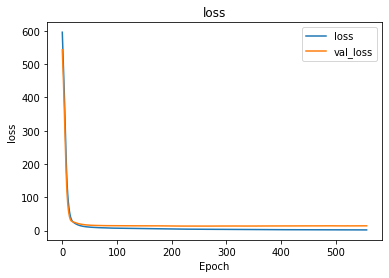

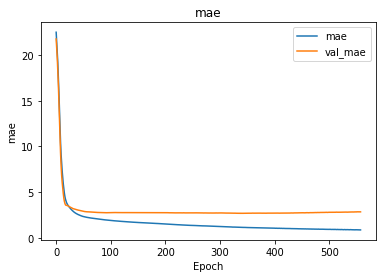

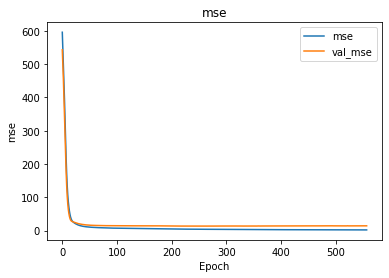

339/339 [==============================] - 0s 50us/sample - loss: 4.3810 - mae: 1.3077 - mse: 4.3810
Train :evaluate score =  [4.381045237403352, 1.3076994, 4.3810453]
167/167 [==============================] - 0s 62us/sample - loss: 16.7311 - mae: 2.6930 - mse: 16.7311
Test :evaluate score =  [16.73106581293894, 2.6930017, 16.731066]

The model performance for  training  set
--------------------------------------
RMSE is 2.093094712766089
R2 score is 0.9502969326739534

The model performance for  testing  set
--------------------------------------
RMSE is 4.090362461866664
R2 score is 0.7789192013788051


In [34]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(widthX,)),
    Dense(16, activation='relu'),
    Dense(1)
   ])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002) # Default value
model.compile(optimizer=optimizer,loss='mse', metrics =['mae', 'mse'])

early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=10000,
    shuffle=False,
    validation_split = 0.2,
    verbose=0, callbacks=[early_stop, PrintDot()]
)

plot_Tesor(history.history, "loss")
plot_Tesor(history.history, "mae")
plot_Tesor(history.history, "mse")

model_sum(model, x_train, y_train, "Train")
model_sum(model, x_test,  y_test,  "Test")

y_train_predict = model.predict(x_train)
y_test_predict =  model.predict(x_test)

linear_Reg_report("training", y_train_predict, y_train)
linear_Reg_report("testing",  y_test_predict, y_test)

#print_coeff()

# Self TESTING, please ignore

In [0]:
                                                 
dataset_path = keras.utils.get_file("auto-mpg.data2", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "modelyear", "origin"]

raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)
dataset = raw_dataset.dropna().copy()

origin = dataset.pop("origin")
dataset["USA"]    = (origin == 1) * 1.0
dataset["Europe"] = (origin == 2) * 1.0
XNames = [x for x in dataset.columns if x != "mpg"]
Y = dataset["mpg"]           #series
X = dataset[XNames]

#Split dataset as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
#X_train = X_train.reset_index(drop=True)
#Y_train = Y_train.reset_index(drop=True)
print(X_train)
print(Y_train)
#Scale X values
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler( )
X_train = scaler.fit_transform( X_train ) #fit and then transform
X_test  = scaler.transform ( X_test )     #transform

#to report result
def linear_Reg_report(dataset_type, predict_Y, actual_Y):
    rmse = (np.sqrt(mean_squared_error(actual_Y, predict_Y)))
    r2 = r2_score(actual_Y, predict_Y)

    print("\nThe model performance for ",  dataset_type, " set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score

lin_model = LinearRegression(normalize=False)
lin_model.fit( X_train, Y_train )

coefDataFrame = pd.DataFrame({'features':         ["intercept"], 
                              'estimatedCoeffs':  lin_model.intercept_.flatten()
                              }
                             )
coefDataFrame = coefDataFrame.append(pd.DataFrame( zip(XNames, lin_model.coef_.flatten()),
                                                  columns=['features', 'estimatedCoeffs']), 
                                     ignore_index=True)
print("regression cooefficients:\n")
print(coefDataFrame)

y_train_predict = lin_model.predict(X_train)
y_test_predict =  lin_model.predict(X_test)

linear_Reg_report("training", y_train_predict, Y_train)
linear_Reg_report("testing",  y_test_predict, Y_test)

print("Yes, intercept ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
lin_model = LinearRegression(normalize=False, fit_intercept=True)
lin_model.fit( X_train, Y_train )
print("\n", lin_model.coef_, "\n")


print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

X = sm.add_constant(X_train) # adding a constant
sm_model = sm.OLS(Y_train.values, X).fit()
sm_model_summary = sm_model.summary()
print(sm_model_summary)

print("No, intercept ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
lin_model = LinearRegression(normalize=False, fit_intercept=False)
lin_model.fit( X, Y_train )
print("\n", lin_model.coef_, "\n")



regression cooefficients:

       features  estimatedCoeffs
0     intercept     2.348041e+01
1     cylinders    -5.608855e-01
2  displacement     2.294041e+00
3    horsepower    -4.852167e-01
4        weight    -5.867469e+00
5  acceleration     3.628640e-01
6     modelyear     2.788355e+00
7           USA    -1.499224e+14
8        Europe    -1.160200e+14
9         Japan    -1.254847e+14

The model performance for  training  set
--------------------------------------
RMSE is 3.3076473263049575
R2 score is 0.818879307342756



The model performance for  testing  set
--------------------------------------
RMSE is 3.168238484516514
R2 score is 0.8385056029649537


Yes, intercept ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 [-5.60885493e-01  2.29404084e+00 -4.85216674e-01 -5.86746896e+00
  3.62863966e-01  2.78835501e+00 -1.49922437e+14 -1.16020019e+14
 -1.25484719e+14] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                          

By statsmodels

https://www.statsmodels.org/stable/regression.html

In [0]:
import statsmodels.api as sm
from patsy import dmatrices

print("0000000000000000000000000000000")
lin_model = LinearRegression(normalize=False, fit_intercept=True)
lin_model.fit( X_train, Y_train )
print("\n", lin_model.coef_, "\n")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#X_train = X_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear']]

#print(X_train.describe().transpose())
#XNames = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'USA', 'Europe', 'Japan']
X= X_train.copy()
#XNames = X.columns
X["Y"] = Y_train.values

y, X = dmatrices('Y ~ cylinders + displacement +  horsepower + weight + acceleration +  modelyear + USA + Europe + Japan', data=X)
#y, X = dmatrices('Y ~ cylinders + displacement +  horsepower + weight + acceleration +  modelyear ', data=X)
sm_model = sm.OLS(y, X).fit()
sm_model_summary = sm_model.summary()
print(sm_model_summary)
print(sm_model.params)

############################################
print("1111111111111111111111111111")
lin_model = LinearRegression(normalize=False, fit_intercept=True)
lin_model.fit( X_train, Y_train )
print("\n", lin_model.coef_, "\n")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

lin_model = LinearRegression(normalize=False, fit_intercept=True)
lin_model.fit( X_train, Y_train.values )
print("\n", lin_model.coef_, "\n")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

lin_model3 = LinearRegression(normalize=True, fit_intercept=True)
lin_model3.fit( X_train, y )
print("\n", lin_model3.coef_, "\n")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


lin_model2 = LinearRegression(normalize=False, fit_intercept=False)
lin_model2.fit( X  , y )
print("\n", lin_model2.coef_, "\n")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#print( X[0:10, 1:])
#print(X[0:10, ])

#coefDataFrame = pd.DataFrame({'features':         ["intercept"], 
#                              'estimatedCoeffs':  lin_model.intercept_.flatten()
#                              }
#                             )
#coefDataFrame = pd.DataFrame( zip(XNames, lin_model.coef_.flatten()[0:]), columns=['features', 'estimatedCoeffs'])
#print("regression cooefficients:\n")
#print(coefDataFrame)



###################################
#X= pd.DataFrame(X_train) ####, columns =['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'USA', 'Europe', 'Japan'])
#X = sm.add_constant(X) # adding a constant
#sm_model = sm.OLS(Y_train.values, X).fit()
#sm_model_summary = sm_model.summary()
#print(sm_model_summary)

# model evaluation for training set
#y_train_predict = sm_model.predict(sm.add_constant(X_train))
## model evaluation for testing set
#y_test_predict = sm_model.predict(sm.add_constant(X_test))

#linear_Reg_report("training", y_train_predict, Y_train)
#linear_Reg_report("testing",  y_test_predict, Y_test)

######################################



0000000000000000000000000000000

 [-0.38946904  0.02158376 -0.01237154 -0.00700083  0.12954429  0.76774449
 -1.55370633  0.83388251  0.71982383] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          3.46e-108
Time:                        00:48:12   Log-Likelihood:                -818.08
No. Observations:                 313   AIC:                             1654.
Df Residuals:                     304   BIC:                             1688.
Df Model:                           8                                         
Covariance Type:            nonrobust                                    

In [0]:
import statsmodels.api as sm
from pandas import DataFrame
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['Stock_Index_Price']
print(type(X))
print(X)
print(Y)
print(type(Y))
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)


predictions = model.predict(X) 


<class 'pandas.core.frame.DataFrame'>
    Interest_Rate  Unemployment_Rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1
0     1464
1     1394
2     1357
3   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Generate artificial data (2 regressors + constant)
nobs = 10000 
X0 = np.random.random((nobs, 2)) 
X = sm.add_constant(X0)
beta = [1, .1, .5] 
e = np.random.random(nobs)
y = np.dot(X, beta) + e 

# Fit regression model
print(sm.OLS(y, X).fit().params)

print(LinearRegression(fit_intercept=True).fit(X0, y).coef_)

print(LinearRegression(fit_intercept=False).fit(X, y).coef_)

[1.5050252  0.08950759 0.50637601]
[0.08950759 0.50637601]
[1.5050252  0.08950759 0.50637601]


In [0]:
from pandas import DataFrame
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719] ,
                'F1':                [1   , 1  , 0,   1  , 0,  1 ,   0   , 1, 0 , 1 , 1,      1  , 1  , 0, 1  , 0, 0,   0, 0   , 0, 0,  1,  1  , 1] ,
                'F2':                [0   , 0  , 1,   0  , 0,  0 ,   0   , 0, 0 , 0 , 0,      0  , 0  , 0, 0  , 0, 0,   0, 0   , 1, 1,  0,  0  , 0]   
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price', "F1", "F2"]) 

X = df[['Interest_Rate','Unemployment_Rate', "F1", "F2"]] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

lin_model = LinearRegression(normalize=False, fit_intercept=True)
lin_model.fit( df[['Interest_Rate','Unemployment_Rate', "F1", "F2"]], Y )
print("\n", lin_model.coef_, "\n")

lin_model = LinearRegression(normalize=True, fit_intercept=False)
lin_model.fit( X, Y )
print("\n", lin_model.coef_, "\n")



                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     44.19
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.28e-09
Time:                        01:30:25   Log-Likelihood:                -133.97
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      19   BIC:                             283.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1887.0090    947.34

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
